In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


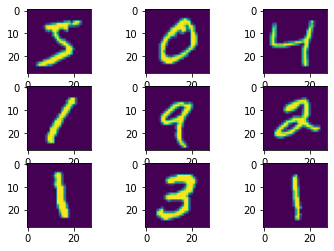

In [3]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(330 + i + 1) #330 là 3 hàng 3 cột
  plt.imshow(X_train[i])
plt.show()

In [4]:
X = X_test
X_train =X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
X_train/=255
X_test/=255

In [7]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [8]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128,epochs =5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/5
469/469 [==============================] - 6s 5ms/step - loss: 0.2483 - accuracy: 0.9238 - val_loss: 0.1055 - val_accuracy: 0.9668
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1006 - accuracy: 0.9700 - val_loss: 0.0776 - val_accuracy: 0.9766
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0719 - accuracy: 0.9779 - val_loss: 0.0785 - val_accuracy: 0.9779
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0590 - accuracy: 0.9822 - val_loss: 0.0779 - val_accuracy: 0.9785
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0479 - accuracy: 0.9856 - val_loss: 0.0732 - val_accuracy: 0.9804


In [10]:
score = model.evaluate(X_test, y_test, verbose = 1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0732 - accuracy: 0.9804
Test loss =  0.07318295538425446
Test accuracy =  0.980400025844574


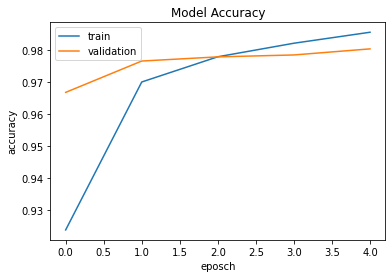

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('eposch')
plt.legend(['train','validation'], loc = 'upper left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


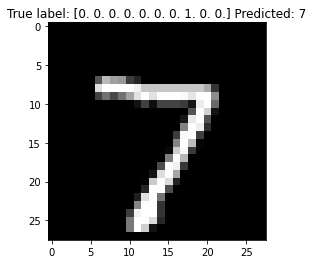

In [12]:
import numpy as np
p_test = model.predict(X_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));